### Numeric solution of the coupled HO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Defining some constants and initial condition

In [2]:
t = np.linspace(0,16,100)
m = 2 # masses of body 1 and 2 are the same
k1 = 20 # spring constant 1
k2 = 20 # spring constant 2
y = [0,0,2,2] # y[0]=x1, y[1]=x2, y[2]=v1, y[3]=v2

### Defining the function to be integrated

In [4]:
def coupled_HO(t,y):
    return (y[2],y[3],-(k1+k2)*y[0]/m + k2*y[1]/m, k2*y[0]/m - k2*y[1]/m)

solution = solve_ivp(coupled_HO, (0,16,100), y0 = y, t_eval=t )

### Plotting the position

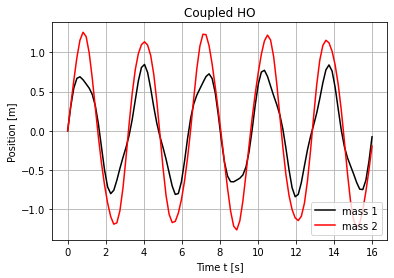

In [5]:
plt.title("Coupled HO")

plt.plot(t,solution.y[0],'k',label = "mass 1")
plt.plot(t,solution.y[1],'r',label = "mass 2")

plt.xlabel("Time t [s]")
plt.ylabel("Position [m]")

plt.grid()
plt.legend()

### Plotting the velocity

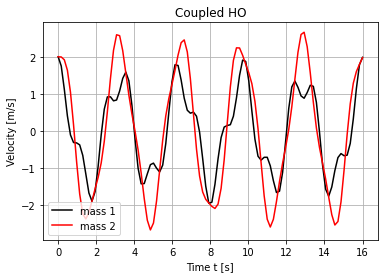

In [6]:
plt.title("Coupled HO")

plt.plot(t,solution.y[2],'k', label = "mass 1")
plt.plot(t,solution.y[3],'r', label = "mass 2")

plt.xlabel("Time t [s]")
plt.ylabel("Velocity [m/s]")

plt.grid()
plt.legend()

### Showing energy conservation

The energy at t=0 is 4.0J
The mean energy at an arbitrary t is 6.8226182881056054J


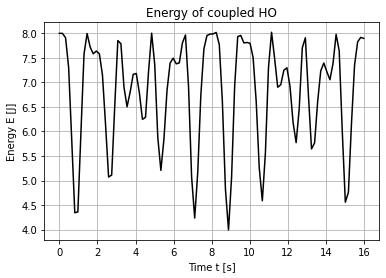

In [7]:
# E = 1/2m(v1^2 + v2^2) + 1/2k1x1^2 + 1/2k2(x1 - x2)^2 + 1/2k2(x2 - x1)^2 = const

E_0 = 0.5*(y[2]**2 + y[3]**2) 
E_t = 0.5*m*(solution.y[2]**2 + solution.y[3]**2) + 0.5*k1*(solution.y[0]**2)
+ 0.5*k2*(solution.y[0] - solution.y[1])**2 + 0.5*k2*(solution.y[1] - solution.y[0])**2
E_kin =  0.5*m*(solution.y[2]**2 + solution.y[3]**2)

plt.plot(t,E_t,'k')
#plt.plot(t,E_kin,'r')

plt.title("Energy of coupled HO")
plt.xlabel("Time t [s]")
plt.ylabel("Energy E [J]")
plt.grid()

E_mean = np.mean(E_t)
print(f"The energy at t=0 is {E_0}J")
print(f"The mean energy at an arbitrary t is {E_mean}J")